In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(13, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
#         self.fc4 = nn.Linear(1000, 1000)
#         self.fc5 = nn.Linear(1000, 1000)
#         self.fc6 = nn.Linear(1000, 1000)
#         self.fc7 = nn.Linear(1000, 1000)
#         self.fc8 = nn.Linear(1000, 1000)
#         self.fc9 = nn.Linear(1000, 1000)
#         self.fc10 = nn.Linear(1000, 1000)

        self.fc11 = nn.Linear(50, 1)

    def forward(self, x, activation):
        x = activation(self.fc1(x))
        x = activation(self.fc2(x))
        x = activation(self.fc3(x))
#         x = activation(self.fc4(x))
#         x = activation(self.fc5(x))
#         x = activation(self.fc6(x))
#         x = activation(self.fc7(x))
#         x = activation(self.fc8(x))
#         x = activation(self.fc9(x))
#         x = activation(self.fc10(x))
        
        x = self.fc11(x)
        return x;

In [3]:
def get_losses(x, y, activation, epochs):
    losses = []
    torch.manual_seed(0)
    net = NeuralNetwork()
        
    y = torch.tensor(y, dtype=torch.float)
    x = torch.tensor(x, dtype=torch.float)
    
#     y = torch.tensor([[24.00]], dtype=torch.float)
#     x = torch.tensor([[0.00632, 18.00,2.310, 0, 0.5380, 6.5750, 65.20, 4.0900, 1, 296.0, 15., 396.90, 4.98 ]], dtype=torch.float)
    
    
    criterion  = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    for i in range(epochs):

        output = net(x, activation)

        optimizer.zero_grad()
        loss = criterion(output, y) 
        loss.backward()
        optimizer.step()
        
        losses.append(loss)
#         print(output)
#         print("epoch: {}, error: {}".format(i, loss))
#     print("next")
    return losses

In [4]:
dataframe = pd.read_csv("data/housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

X = dataset[:,0:13]
Y = dataset[:,13:14]

In [5]:
n_epochs = 1000

sigmoid_losses = get_losses(X, Y, nn.Sigmoid(), n_epochs)
print("sigmoid loss: {}".format(sigmoid_losses[-1]))

tanh_losses = get_losses(X, Y, nn.Tanh(), n_epochs)
print("tanh loss: {}".format(tanh_losses[-1]))

relu_losses = get_losses(X, Y, nn.ReLU(), n_epochs)
print("ReLU loss: {}".format(relu_losses[-1]))

leaky_relu_losses = get_losses(X, Y, nn.LeakyReLU(0.1), n_epochs)
print("Leaky ReLU loss: {}".format(leaky_relu_losses[-1]))

ELU_losses = get_losses(X, Y, nn.ELU(), n_epochs)
print("ELU loss: {}".format(ELU_losses[-1]))

sigmoid loss: 84.4205322265625
tanh loss: 35.14045333862305
ReLU loss: 8.290190696716309
Leaky ReLU loss: 9.128073692321777
ELU loss: 7.2334065437316895


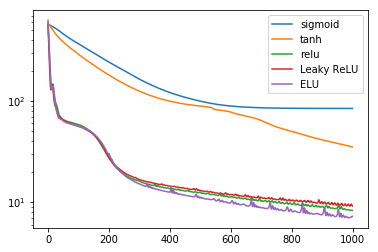

In [6]:
epochs = range(n_epochs)
plt.plot( 
    epochs, sigmoid_losses,
    epochs, tanh_losses,
    epochs, relu_losses,
    epochs, leaky_relu_losses,
    epochs, ELU_losses)
plt.legend(["sigmoid", "tanh", "relu", "Leaky ReLU", "ELU"])
plt.yscale('log')